<a href="https://colab.research.google.com/github/JefersonSMAlmeida/portifolio_data_science/blob/main/Panorama_do_COVID_19_no_Brasil_e_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global.

A maioria das pessoas que adoece em decorrência da COVID-19 apresenta sintomas leves a moderados e se recupera sem tratamento especial. No entanto, algumas desenvolvem um quadro grave e precisam de atendimento médico.

<center><img alt="Colaboratory logo" width="70%" src="https://images.unsplash.com/photo-1583324113626-70df0f4deaab?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1032&q=80"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Para a nossa análise, vou utilizar a base do ourworldindata.org, que em parceria com a Universidade de Oxford, realiza a coleta de dados sobre casos confirmados, mortes, hospitalizações, testes, vacinas e outras variáveis de potencial interesse pelo mundo.

Por se tratar de uma doença muito recente, com sintomas parecidos com a gripe e de fácil transmissão, torna o trabalho de análise dos dados mais complexa. Um dos exemplos é de conflitos entre os dados do governo federal, estadual e dados não oficiais.

### Dicionário de Variáveis
Para começar o trabalho de análise, vamos pegar o dicionário de variáveis existentes dentro dessa base.


*   `iso_code` -	ISO 3166-1 alpha-3 – códigos de país de três letras;
*   `continent`	-  Continente da localização geográfica;
*   `location` -	Localização geográfica;
*   `date` -	Data da observação;
*   `total_cases` -	Total de casos confirmados de COVID-19;
*   `new_cases` -	Novos casos confirmados de COVID-19;
*   `new_cases_smoothed` -	Novos casos confirmados de COVID-19 (suavizado em 7 dias);
*   `total_deaths` -	Total de mortes atribuídas ao COVID-19;
*   `new_deaths` -	Novas mortes atribuídas ao COVID-19;
*   `new_deaths_smoothed` -	Novas mortes atribuídas ao COVID-19 (suavizado de 7 dias);
*   `total_cases_per_million` -	Total de casos confirmados de COVID-19 por 1.000.000 de pessoas;
*   `new_cases_per_million` -	Novos casos confirmados de COVID-19 por 1.000.000 de pessoas;
*   `new_cases_smoothed_per_million` -	Novos casos confirmados de COVID-19 (suavizado em 7 dias) por 1.000.000 de pessoas;
*   `total_deaths_per_million` -	Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas;
*   `new_deaths_per_million` -	Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas;
*   `new_deaths_smoothed_per_million` -	Novas mortes atribuídas ao COVID-19 (suavizado de 7 dias) por 1.000.000 de pessoas;
*   `reproduction_rate` -	Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19. Veja https://github.com/crondonm/TrackingR/tree/main/Estimates-Database;
*   `icu_patients` -	Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia;
*   `icu_patients_per_million` -	Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia por 1.000.000 pessoas;
*   `hosp_patients` -	Número de pacientes com COVID-19 no hospital em um determinado dia;
*   `hosp_patients_per_million` -	Número de pacientes com COVID-19 no hospital em um determinado dia por 1.000.000 de pessoas;
*   `weekly_icu_admissions` -	Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana;
*   `weekly_icu_admissions_per_million` -	Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana por 1.000.000 de pessoas;
*   `weekly_hosp_admissions` -	Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana;
*   `weekly_hosp_admissions_per_million` -	Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas;
*   `total_tests` -	Total de testes para COVID-19;
*   `new_tests` -	Novos testes para COVID-19 (calculado apenas para dias consecutivos);
*   `total_tests_per_thousand` -	Total de testes para COVID-19 por 1.000 pessoas;
*   `new_tests_per_thousand` -	Novos testes para COVID-19 por 1.000 pessoas;
*   `new_tests_smoothed` -	Novos testes para COVID-19 (suavizado de 7 dias). Para países que não relatam dados de teste diariamente, assumimos que os testes mudaram igualmente diariamente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias;
*   `new_tests_smoothed_per_thousand` -	Novos testes para COVID-19 (suavizado de 7 dias) por 1.000 pessoas;
*   `positive_rate` -	A parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case);
*   `tests_per_case` -	Testes realizados por novo caso confirmado de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de positive_rate);
*   `tests_units` -	Unidades usadas pelo local para relatar seus dados de teste;
*   `total_vaccinations` -	Número total de doses de vacinação COVID-19 administradas;
*   `people_vaccinated` -	Número total de pessoas que receberam pelo menos uma dose de vacina;
*   `people_fully_vaccinated` -	Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação;
*   `total_boosters` -	Número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação);
*   `new_vaccinations` -	Novas doses de vacinação COVID-19 administradas (calculadas apenas para dias consecutivos);
*   `new_vaccinations_smoothed` -	Novas doses de vacinação COVID-19 administradas (suavizado por 7 dias). Para países que não relatam dados de vacinação diariamente, assumimos que a vacinação mudou igualmente diariamente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias;
*   `total_vaccinations_per_hundred` -	Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total;
*   `people_vaccinated_per_hundred` -	Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total;
*   `people_fully_vaccinated_per_hundred` -	Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total;
*   `total_boosters_per_hundred` -	Número total de doses de reforço de vacinação COVID-19 administradas por 100 pessoas na população total;
*   `new_vaccinations_smoothed_per_million` -	Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias) por 1.000.000 de pessoas na população total;
*   `new_people_vaccinated_smoothed` -	Número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias);
*   `new_people_vaccinated_smoothed_per_hundred` -	Número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias) por 100 pessoas na população total;
*   `stringency_index` -	Índice de Rigidez de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa);
*   `population` -	População (últimos valores disponíveis). Consulte https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv para obter a lista completa de fontes;
*   `population_density` -	Número de pessoas dividido por área de terra, medido em quilômetros quadrados, ano mais recente disponível;
*   `median_age` -	Idade média da população, projeção da ONU para 2020;
*   `aged_65_older` -	Parcela da população com 65 anos ou mais, ano mais recente disponível;
*   `aged_70_older` -	Parcela da população com 70 anos ou mais em 2015;
*   `gdp_per_capita` -	Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível;
*   `extreme_poverty` -	Percentual da população que vive em extrema pobreza, ano mais recente disponível desde 2010;
*   `cardiovasc_death_rate` -	Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas);
*   `diabetes_prevalence` -	Prevalência de diabetes (% da população de 20 a 79 anos) em 2017;
*   `female_smokers` -	Proporção de mulheres que fumam, ano mais recente disponível;
*   `male_smokers` -	Proporção de homens que fumam, ano mais recente disponível;
*   `handwashing_facilities` -	Percentagem da população com instalações básicas de lavagem das mãos nas instalações, ano mais recente disponível;
*   `hospital_beds_per_thousand` -	Camas hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010;
*   `life_expectancy` -	Expectativa de vida ao nascer em 2019;
*   `human_development_index` -	Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente. Valores para 2019, importados de http://hdr.undp.org/en/indicators/137506;
*   `excess_mortality` -	Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020-2021 e o número projetado de mortes para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality;
*   `excess_mortality_cumulative` -	Diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality;
*   `excess_mortality_cumulative_absolute` - Diferença cumulativa entre o número relatado de óbitos desde 1º de janeiro de 2020 e o número projetado de óbitos para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality;
*   `excess_mortality_cumulative_per_million` -	Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por milhão de pessoas. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality;




### Importando os dados do COVID-19

Hora de importar a base em csv do OWID e das bibliotecas necessárias para a análise.

In [5]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Análise Exploratória dos Dados

Vamos iniciar as nossas análises, antes de tudo, é necessário conhecer um pouco da base que vamos utilizar.

Indo de forma macro, os dados estão distribuidos em mais de **155 Mil** entradas e **67** variáveis.

*PS: Vale lembrar que esses valores são até o momento que estou fazendo a análise. Por ser uma base viva, os valores serão diferentes no momento da sua leitura.*

Não podemos nos esquecer também de conferir quais são os tipos de variáveis com que vamos trabalhar.

In [2]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# identificar os tipos de variáveis
display(df.dtypes)

Entradas:	 157012
Variáveis:	 67



iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Indo um pouco mais a fundo na base, agora vou trazer as primeiras 5 e as últimas linhas da base. Dessa forma, já é possível conhecer como o dado está estruturado, quais estão faltando e quais vamos utilizar para a análise.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# mostrar as 5 últimas entradas
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
157007,ZWE,Africa,Zimbabwe,2022-01-20,227552.0,665.0,352.571,5276.0,10.0,7.714,15077.486,44.063,23.361,349.585,0.663,0.511,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,1816276.0,120.346,0.293,4675.0,0.31,0.0754,13.3,tests performed,7483232.0,4228652.0,3254580.0,NaN,10679.0,10562.0,49.58,28.02,21.56,NaN,700.0,5087.0,0.034,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157008,ZWE,Africa,Zimbabwe,2022-01-21,227961.0,409.0,332.000,5288.0,12.0,7.143,15104.586,27.100,21.998,350.380,0.795,0.473,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7496882.0,4234640.0,3262242.0,NaN,13650.0,10405.0,49.67,28.06,21.62,NaN,689.0,5021.0,0.033,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157009,ZWE,Africa,Zimbabwe,2022-01-22,228179.0,218.0,363.143,5292.0,4.0,7.714,15119.031,14.445,24.062,350.645,0.265,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7506786.0,4239537.0,3267249.0,NaN,9904.0,10567.0,49.74,28.09,21.65,NaN,700.0,5058.0,0.034,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157010,ZWE,Africa,Zimbabwe,2022-01-23,228254.0,75.0,310.857,5294.0,2.0,6.714,15124.000,4.969,20.597,350.778,0.133,0.445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7512903.0,4242647.0,3270256.0,NaN,6117.0,10631.0,49.78,28.11,21.67,NaN,704.0,5182.0,0.034,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157011,ZWE,Africa,Zimbabwe,2022-01-24,228541.0,287.0,297.286,5305.0,11.0,6.714,15143.017,19.016,19.698,351.507,0.729,0.445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Colunas
Lembra do dicionário de variáveis lá em cima ? Bom, é possível olhar trazer ele também com o `df.columns`.

In [5]:
# mostrar as colunas da base
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Valores Ausentes
Lá em cima, quando peguei as primeiras e as últimas 5 entradas, reparei alguns valores faltantes. Nesse caso, vamos então validar quais das variáveis estão vazias e quais podemos utilizar para o estudo.

In [6]:
# mostar quais variáveis estão ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                      0.972180
weekly_icu_admissions_per_million          0.972180
excess_mortality_cumulative_per_million    0.966003
excess_mortality                           0.966003
excess_mortality_cumulative_absolute       0.966003
                                             ...   
total_cases                                0.018101
population                                 0.006592
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

Como uma primeira manipulação de dado, vou transformar os valores da coluna `date` para `datetime`.


In [7]:
# converter date para datetime
df.date = pd.to_datetime(df.date)

E em seguida, deixei o código abaixo para identificar qual é a data mais recente da base. (Dia atual -1)

In [8]:
#Separar data mais recente de países com mais casos e mortes.
data_recente = (df.date).sort_values(ascending=False).head(1)
df_str = pd.Series.to_string(data_recente)
data = df_str.split()
data[1]

'2022-01-24'

Partindo para a primeira análise, quero saber quais são os 5 principais países com mais casos de Covid registrados até o momento. Filtrando então pela variável alocada com a data recente, preciso ordenar de forma ascendente a variável `total_cases` e puxar também a variável `location`:

In [9]:
# mostrar um ranking de total de casos por país
df.loc[df.date == data[1], ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[8:13]

,location,total_cases
149161,United States,71708189.0
131642,South America,46022582.0
66532,India,39799202.0
20820,Brazil,24142032.0
51580,France,16852414.0


Para saber quais são os países que concentram o maior número de mortes pela doença, aplico então a mesma lógica, trocando somente pela variável `total_deaths`:

In [10]:
# mostrar um ranking de total de mortes por país
df.loc[df.date == data[1], ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[7:12]

,location,total_deaths
131642,South America,1205565.0
48042,European Union,943421.0
149161,United States,868503.0
20820,Brazil,623636.0
66532,India,490462.0


No intuito de deixar esses resultados mais visuais, resolvi plotar um gráfico de barras para cada um:

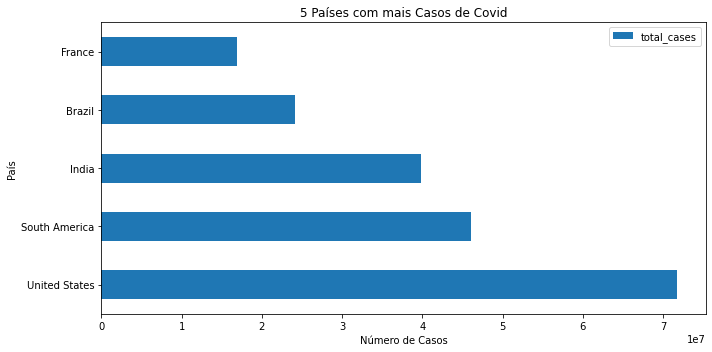

In [11]:
#plotar o gráfico com o ranking de países com mais casos confirmados pelo mundo
top5 = df.loc[df.date == data[1], ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[8:13]

fig, ax = plt.subplots(figsize=(10,5))

top5.plot(x = "location", y = "total_cases", kind = 'barh', ax=ax)

ax.set_title("5 Países com mais Casos de Covid")
ax.set_ylabel("País")
ax.set_xlabel("Número de Casos")

plt.tight_layout()

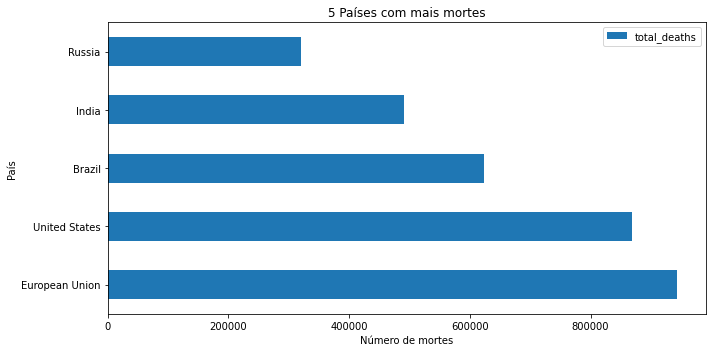

In [12]:
#plotar o gráfico com o ranking de países com mais mortes por Covid pelo mundo
top5 = df.loc[df.date == data[1], ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[8:13]

fig, ax = plt.subplots(figsize=(10,5))

top5.plot(x = "location", y = "total_deaths", kind = 'barh', ax=ax)

ax.set_title("5 Países com mais mortes")
ax.set_ylabel("País")
ax.set_xlabel("Número de mortes")

plt.tight_layout()

Podemos plotar também como foi a evolução de transmissão de Covid com o decorrer dos dias.

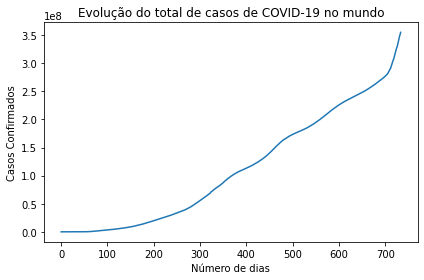

In [13]:
#plotar o gráfico com evolução de casos confirmandos pelo mundo
fig, ax = plt.subplots()

df.loc[df.location == "World", "total_cases"].reset_index(drop=True).plot()

ax.set_title("Evolução do total de casos de COVID-19 no mundo")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Número de dias")

plt.tight_layout()

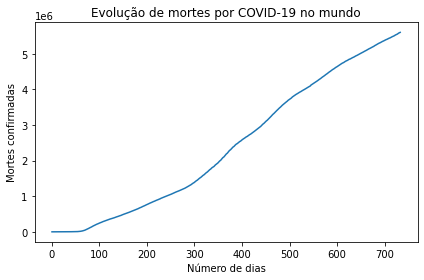

In [14]:
#plotar o gráfico com evolução de mortes por Covid pelo mundo
fig, ax = plt.subplots()

df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()

ax.set_title("Evolução de mortes por COVID-19 no mundo")
ax.set_ylabel("Mortes confirmadas")
ax.set_xlabel("Número de dias")

plt.tight_layout()

Usando a variável `people_vaccinated` podemos dar uma olhada quais países hoje estão a frente do processo de imunização.

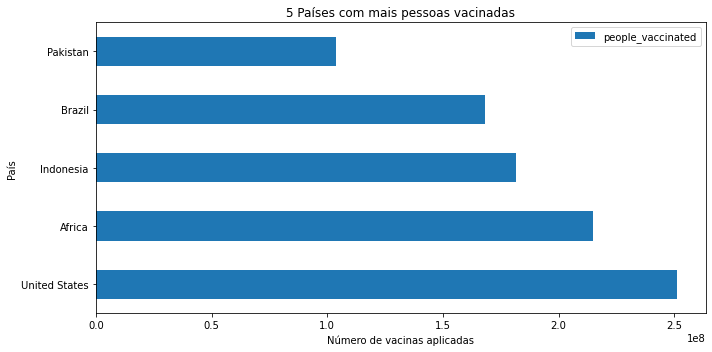

In [18]:
#plotar o gráfico com o ranking de países com mais doses de vacinas aplicadas
top5 = df.loc[df.date == data[1], ['location', 'people_vaccinated']].sort_values(by="people_vaccinated", ascending=False)[10:15]

fig, ax = plt.subplots(figsize=(10,5))

top5.plot(x = "location", y = "people_vaccinated", kind = 'barh', ax=ax)

ax.set_title("5 Países com mais pessoas vacinadas")
ax.set_ylabel("País")
ax.set_xlabel("Número de vacinas aplicadas")

plt.tight_layout()

# E no Brasil ?

Agora quero dar uma olhada melhor focando apenas no nosso país. Mas calma, que não precisamos importar novamente a base ou as bibliotecas.

Como na base que estavamos usando já possui dados sobre o Brasil, basta então criar uma cópia, filtrando apenas as entradas que a variável `location` esteja preenchida com o nosso país.

In [20]:
# criar uma cópia da base com dados do Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

Infelizmente, o Brasil foi um dos países que a contaminação foi mais efetiva, deixando tanto a quantidade de casos confirmados quanto o de mortes sempre elevados. 

E quando foi registrada a primeira morte por covid aqui no Brasil ?

In [21]:
data_atualizada1 = df_brasil.loc[df_brasil.total_deaths==1, 'date']
df_str1 = pd.Series.to_string(data_atualizada1)
separar1 = df_str1.split()
print(f'A primeira morte no Brasil foi registrada em: {separar1[1]}')

A primeira morte no Brasil foi registrada em: 2020-03-17


E quanto tempo passou desde o primeiro caso confirmado até a primeira primeira morte ?

In [22]:
primeiro_caso = df_brasil.loc[df_brasil.total_cases==1, 'date']
df_str2 = pd.Series.to_string(primeiro_caso.head(1))
separar2 = df_str2.split()
date1 = datetime.datetime.strptime(separar1[1], '%Y-%m-%d').date()
date2 = datetime.datetime.strptime(separar2[1], '%Y-%m-%d').date()
register_fs_death = date1 - date2
print(f'Considerando o primeiro caso de COVID-19 registrado, se passaram {register_fs_death.days} dias até registrarmos a primeira morte.')

Considerando o primeiro caso de COVID-19 registrado, se passaram 20 dias até registrarmos a primeira morte.


Como sou um pessoa muito visual, resolvi trazer os gráficos de evolução de casos e mortes por Covid no Brasil, com o decorrer dos dias.

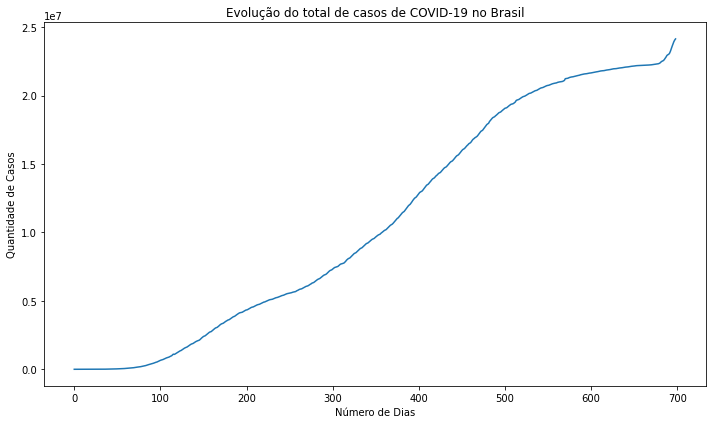

In [23]:
#plotar o gráfico com evolução de casos confirmados no Brasil
fig, ax = plt.subplots(figsize=(10,6))
df_brasil.loc[df_brasil.location == 'Brazil', 'total_cases'].reset_index(drop=True).plot(kind='line', ax=ax)
ax.set_title("Evolução do total de casos de COVID-19 no Brasil")
ax.set_xlabel('Número de Dias')
ax.set_ylabel('Quantidade de Casos')
plt.tight_layout()

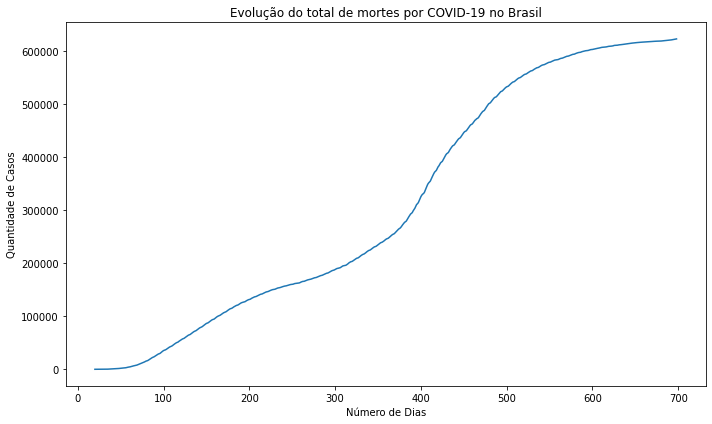

In [24]:
#plotar o gráfico com evolução de mortes no Brasil
fig, ax = plt.subplots(figsize=(10,6))
df_brasil.loc[df_brasil.location == 'Brazil', 'total_deaths'].reset_index(drop=True).plot(kind='line', ax=ax)
ax.set_title("Evolução do total de mortes por COVID-19 no Brasil")
ax.set_xlabel('Número de Dias')
ax.set_ylabel('Quantidade de Casos')
plt.tight_layout()

E para finalizar, queria ver como foi a evolução de doses aplicadas das vacinas aqui pelo Brasil:

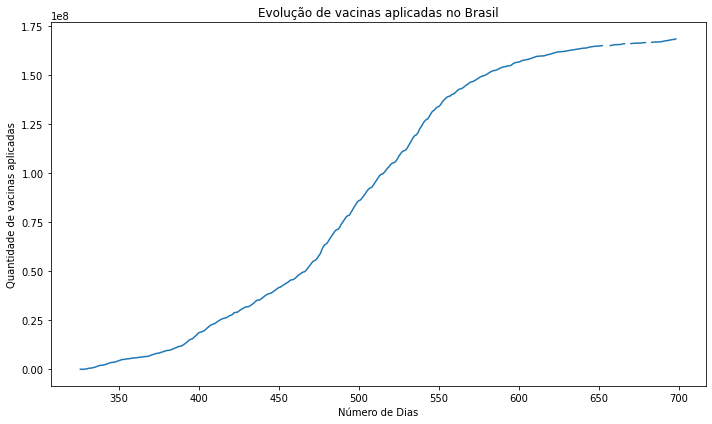

In [25]:
#plotar o gráfico com evolução de vacinas aplicadas
fig, ax = plt.subplots(figsize=(10,6))
df_brasil.loc[df_brasil.location == 'Brazil', 'people_vaccinated'].reset_index(drop=True).plot(kind='line', ax=ax)
ax.set_title("Evolução de vacinas aplicadas no Brasil")
ax.set_xlabel('Número de Dias')
ax.set_ylabel('Quantidade de vacinas aplicadas')
plt.tight_layout()

## Conclusão

Apesar desse documento enorme, a intenção desse estudo era de ser algo inicial, para entender como a transmissão do Covid 19 afetou o mundo, e de forma especifica, o Brasil também. Mesmo que já tenha se passado 2 anos de pandemia e com a campanha de vacinação consideravelmente rápida, o despreparo do governo refletiu nos números de pessoas que testaram positivo e, infelizmente na quantidade de pessoas que perderam a vida por conta do vírus.

Outro ponto que temos que ter em mente é o surgimento das novas variantes da doença que além de serem altamente transmissíveis, faz o processo de imunização ganhar novas etapas.

Ainda que a visão é um pouco negativa, devemos ter esperança de que o cenário será revertido, os países e seus governantes levem a sério o rumo da imunização com a comunidade cientifica e que o Covid 19 seja controlado de forma efetiva.